In [179]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [180]:
texts =['자연어 처리 알고리즘', '자연어 처리 방법','자연어 NLP 알고리즘 알고리즘', '자연어 처리 전문가']

In [181]:
tok = Tokenizer() # 클래스(설계도), 객체(건물)
tok.fit_on_texts(texts)

In [182]:
tok.index_word

{1: '자연어', 2: '처리', 3: '알고리즘', 4: '방법', 5: 'nlp', 6: '전문가'}

In [183]:
tok.texts_to_matrix(texts) # default : mode = 'binary
tok.texts_to_matrix(texts, mode='count')
tok.texts_to_matrix(texts, mode='tfidf')
tok.texts_to_matrix(texts, mode='freq')

array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.5       , 0.        ,
        0.25      , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.33333333]])

In [184]:
df = pd.read_csv('/content/drive/MyDrive/NYT_2018.csv')
df

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5ae82c93068401528a2ab969,1004,By CLAIRE CAIN MILLER,article,This Common Question Reinforces the Gender Pay...,"['Discrimination', 'Wages and Salaries', 'Labo...",68,Upshot,3,2018-05-01 09:00:01,Unknown,Several states and cities have ordered employe...,The New York Times,News,https://www.nytimes.com/2018/05/01/upshot/how-...
1320,5ae82c95068401528a2ab96b,1043,By TRACY J. GATES,article,"Anna, Llama and Me","['Friendship', 'Dewdney, Anna', 'Writing and W...",65,Well,0,2018-05-01 09:00:02,Family,"The beginning, middle and end of a picture boo...",The New York Times,News,https://www.nytimes.com/2018/05/01/well/family...
1321,5ae82c9d068401528a2ab96d,659,Interview by AUDIE CORNISH,article,Gen. Michael Hayden Has One Regret: Russia,"['Classified Information and State Secrets', '...",66,Magazine,70,2018-05-01 09:00:06,Unknown,"The former N.S.A. and C.I.A. chief on Trump, S...",The New York Times,News,https://www.nytimes.com/2018/05/01/magazine/ge...
1322,5ae82c9f068401528a2ab96f,1155,By JASON ROBERT BROWN,article,There Is Nothin’ Like a Tune,"['Books and Literature', 'Purdum, Todd S', 'Th...",68,BookReview,17,2018-05-01 09:00:07,Book Review,"In “Something Wonderful,” Todd S. Purdum analy...",The New York Times,Review,https://www.nytimes.com/2018/05/01/books/revie...


In [185]:
headline = []
headline.extend(list(df.headline.values))

In [186]:
headline # Unknown 많아보임

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [187]:
len(headline)

1324

In [188]:
sum(df.headline == 'Unknown')
#len([w for w in headline if w=='Unknown']) #같은 코드

110

In [189]:
headline=[w for w in headline if w!='Unknown']
len(headline)

1214

#### 전처리

In [190]:
post_headline = []

for sentence in pre_headline :
    post_headline.append(' '.join([word for word in sentence.split(' ') if word not in stopwords.words('english')]))

print(post_headline)

['former nfl cheerleaders’ settlement offer 1 meeting goodell', 'epa unveil new rule effect less science policymaking', 'new noma explained', 'bag texas dirt  became times tradition', 'school place selfexpression', 'commuter reprogramming', 'ford changed leaders looking lift it’s still looking', 'romney failed win utah convention believe he’s doomed', 'chain reaction', 'forced vatican investigate sex abuse he’s meeting pope francis', 'berlin artists find home', 'right stuff', 'jimmy carter knows north korea wants', 'truth', 'new jersey ruling could reignite battle churchstate separation', 'procrastinating', 'word  quiz dilatory', 'lifethreatening bout e coli food poisoning', 'choosing brexit town yearned seafaring past muddied future', 'quote disproved', 'hot stuff turns cold', 'top pay gap may gone', 'years bizarre behavior got guns back', 'court stand mr trump', 'hope arizona', 'human rights groups failed economic equality', 'american tragedy nashville', 'don’t need education', 'paul

In [191]:
def pre_func(title):
  # 소문자 변환
  res =''.join(w.lower() for w in title if w not in punctuation)
  return res

In [192]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [193]:
pre_headline = [pre_func(x) for x in post_headline]

In [194]:
pre_headline

['former nfl cheerleaders’ settlement offer 1 meeting goodell',
 'epa unveil new rule effect less science policymaking',
 'new noma explained',
 'bag texas dirt  became times tradition',
 'school place selfexpression',
 'commuter reprogramming',
 'ford changed leaders looking lift it’s still looking',
 'romney failed win utah convention believe he’s doomed',
 'chain reaction',
 'forced vatican investigate sex abuse he’s meeting pope francis',
 'berlin artists find home',
 'right stuff',
 'jimmy carter knows north korea wants',
 'truth',
 'new jersey ruling could reignite battle churchstate separation',
 'procrastinating',
 'word  quiz dilatory',
 'lifethreatening bout e coli food poisoning',
 'choosing brexit town yearned seafaring past muddied future',
 'quote disproved',
 'hot stuff turns cold',
 'top pay gap may gone',
 'years bizarre behavior got guns back',
 'court stand mr trump',
 'hope arizona',
 'human rights groups failed economic equality',
 'american tragedy nashville',
 'd

In [195]:
tok = Tokenizer()

In [196]:
tok.fit_on_texts(pre_headline)

In [197]:
tok.index_word
len(tok.index_word)

3510

In [198]:
vocab_size = len(tok.index_word)+1

In [199]:
from sqlalchemy.sql.schema import Sequence
sequences=[]
for s in pre_headline :
  #print(words_not_stopwords)
  # print(tok.texts_to_sequences([s])[0]) # 각 문장별 인코딩
  enc=tok.texts_to_sequences([s])[0]
  for i in range(1,len(enc)):
    seq = enc[:i+1]
    sequences.append(seq)

In [200]:
print(sequences)

[[38, 187], [38, 187, 1006], [38, 187, 1006, 1007], [38, 187, 1006, 1007, 489], [38, 187, 1006, 1007, 489, 12], [38, 187, 1006, 1007, 489, 12, 287], [38, 187, 1006, 1007, 489, 12, 287, 1008], [39, 1009], [39, 1009, 2], [39, 1009, 2, 490], [39, 1009, 2, 490, 1010], [39, 1009, 2, 490, 1010, 288], [39, 1009, 2, 490, 1010, 288, 289], [39, 1009, 2, 490, 1010, 288, 289, 1011], [2, 1012], [2, 1012, 1013], [491, 142], [491, 142, 290], [491, 142, 290, 1014], [491, 142, 290, 1014, 291], [491, 142, 290, 1014, 291, 492], [96, 67], [96, 67, 1015], [1016, 1017], [1018, 1019], [1018, 1019, 97], [1018, 1019, 97, 292], [1018, 1019, 97, 292, 1020], [1018, 1019, 97, 292, 1020, 16], [1018, 1019, 97, 292, 1020, 16, 32], [1018, 1019, 97, 292, 1020, 16, 32, 292], [1021, 493], [1021, 493, 293], [1021, 493, 293, 494], [1021, 493, 293, 494, 1022], [1021, 493, 293, 494, 1022, 495], [1021, 493, 293, 494, 1022, 495, 143], [1021, 493, 293, 494, 1022, 495, 143, 1023], [1024, 1025], [496, 1026], [496, 1026, 1027], [4

In [201]:
sequences[:15]
'''
ex) lstm 모델로 단어를 예측하도록 설계합니다.
입력                                  출력
----------------------------------------
lstm                                모델로
lstm 모델로                           단어를
...
lstm 모델로 단어를 예측하도록             설계합니다
'''


'\nex) lstm 모델로 단어를 예측하도록 설계합니다.\n입력                                  출력\n----------------------------------------\nlstm                                모델로\nlstm 모델로                           단어를\n...\nlstm 모델로 단어를 예측하도록             설계합니다\n'

In [202]:
sents=[['programmer','person'],
       ['programmer','word','secret']]

In [203]:
mytok = Tokenizer() # num_words : 빈도수가 높은 순서대로 상위 n 개의 단어로만 진행
mytok.fit_on_texts(sents) # fit 해줘야 아래 결과값 볼 수 있음
print(mytok.word_index) # 단어당 인덱스 부여
print(mytok.texts_to_sequences(sents)) # ()에 해당하는 text에 대해 리스트 값으로 인덱스부여

{'programmer': 1, 'person': 2, 'word': 3, 'secret': 4}
[[1, 2], [1, 3, 4]]


In [204]:
print(max(len(i) for i in sequences)) # 24 단어 문장이 가장 길다
ml = max(len(i) for i in sequences)
print(ml)

18
18


In [205]:
sequences[1] # 지금은 길이가 3 이지최대가 24여야함

[38, 187, 1006]

In [206]:
sequences = pad_sequences(sequences, maxlen = ml, padding='pre')

In [207]:
sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   38,  187, 1006], dtype=int32)

In [208]:
# sequences를 x,y로 분리하여 저장
# x = [i[:-1] for i in sequences ]
# y = [i[-1] for i in sequences ]
# 위의 코드로 하면 list 형태로 나오는데 , array 형태인 것이 좋으므로 아래 코드로 재진행
sequences = np.array(sequences)
x = sequences[:,:-1]
y = sequences[:, -1]

In [209]:
sequences.shape

(4905, 18)

In [210]:
x.shape

(4905, 17)

In [211]:
y.shape

(4905,)

In [212]:
y = to_categorical(y, vocab_size)

In [213]:
y.shape

(4905, 3511)

In [214]:
# 반드시 원핫인코딩!!!!! 안할시 cost 계산 불가..

In [216]:
model = Sequential()
#vocab_size # 3620 원래는 이걸 해야하는게 너무 크다
model.add(Embedding(vocab_size, 10)) # 3620 -> 10 차원으로 임베딩
model.add(LSTM(128,return_sequences=True)) # 128차원으로 결과가 나오게 하는 것
model.add(LSTM(64))
model.add(Dense(vocab_size,activation='softmax')) # 다 확률값으로 나옴

##### 필기

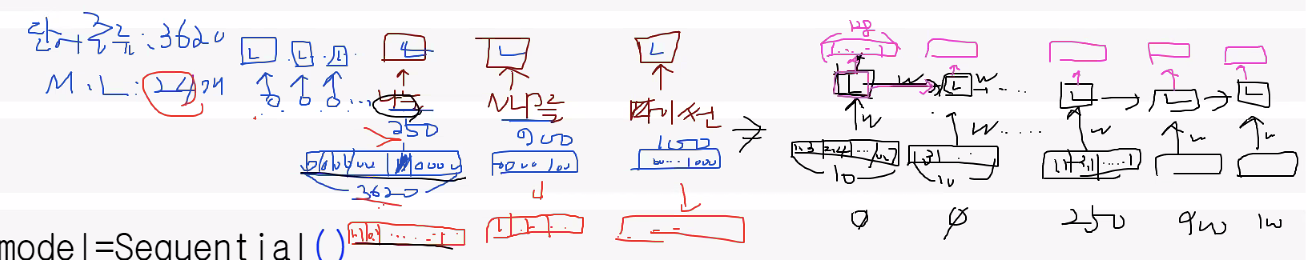

In [217]:
model.summary()
# (None, None, 10) -> 중간 None 은 사실 24에 해당

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 10)          35110     
                                                                 
 lstm_11 (LSTM)              (None, None, 128)         71168     
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 3511)              228215    
                                                                 
Total params: 383,901
Trainable params: 383,901
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x,y,epochs=200, verbose=2)

Epoch 1/200
154/154 - 15s - loss: 8.1616 - accuracy: 0.0035 - 15s/epoch - 98ms/step
Epoch 2/200
154/154 - 2s - loss: 7.9836 - accuracy: 0.0073 - 2s/epoch - 14ms/step
Epoch 3/200
154/154 - 2s - loss: 7.8450 - accuracy: 0.0075 - 2s/epoch - 14ms/step
Epoch 4/200
154/154 - 2s - loss: 7.7782 - accuracy: 0.0080 - 2s/epoch - 15ms/step
Epoch 5/200
154/154 - 2s - loss: 7.6460 - accuracy: 0.0086 - 2s/epoch - 15ms/step
Epoch 6/200
154/154 - 1s - loss: 7.5222 - accuracy: 0.0094 - 1s/epoch - 9ms/step
Epoch 7/200
154/154 - 1s - loss: 7.4250 - accuracy: 0.0094 - 1s/epoch - 7ms/step
Epoch 8/200
154/154 - 2s - loss: 7.3304 - accuracy: 0.0161 - 2s/epoch - 10ms/step
Epoch 9/200
154/154 - 1s - loss: 7.2181 - accuracy: 0.0145 - 1s/epoch - 8ms/step
Epoch 10/200
154/154 - 1s - loss: 7.1005 - accuracy: 0.0149 - 1s/epoch - 9ms/step
Epoch 11/200
154/154 - 1s - loss: 6.9822 - accuracy: 0.0169 - 1s/epoch - 9ms/step
Epoch 12/200
154/154 - 1s - loss: 6.8662 - accuracy: 0.0183 - 1s/epoch - 8ms/step
Epoch 13/200
154/

In [219]:
def gen_sent(model, tok, c_word, n):
    pred_sent=''
    # 구현
    for _ in range(n):
      enc=tok.texts_to_sequences([c_word])[0]
      enc=pad_sequences([enc], maxlen=ml, padding='pre')
      #print(enc)
      res=model.predict(enc)
      res=np.argmax(res)
      for w, i in tok.word_index.items():
          if i==res:
              break
      print("예측단어:",w)
      c_word=c_word+ " " + w    #  The => The new
    print(c_word)
    #pred_sent=
    return pred_sent

In [220]:
gen_sent(model, tok, 'tree', 10)

1/1 [==============================] - 1s 618ms/step
예측단어: short
1/1 [==============================] - 0s 19ms/step
예측단어: antibias
1/1 [==============================] - 0s 19ms/step
예측단어: training
1/1 [==============================] - 0s 18ms/step
예측단어: employees
1/1 [==============================] - 0s 18ms/step
예측단어: british
1/1 [==============================] - 0s 26ms/step
예측단어: image
1/1 [==============================] - 0s 20ms/step
예측단어: investigation
1/1 [==============================] - 0s 20ms/step
예측단어: economic
1/1 [==============================] - 0s 20ms/step
예측단어: shift
1/1 [==============================] - 0s 18ms/step
예측단어: crowd
tree short antibias training employees british image investigation economic shift crowd


''